## Information gain - mutual information

Mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

As extracted from [wikipedia](https://en.wikipedia.org/wiki/Mutual_information):

Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

I will demonstrate how to select features based on mutual information using sklearn on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [2]:
# load dataset
data = pd.read_csv('paribas.csv', nrows=50000)
data.shape

(50000, 133)

In [3]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [4]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

### Important

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [6]:
# calculate the mutual information between the variables and the target
# this returns the mutual information value of each feature
# the smaller the value the less information the feature has about the
# target
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([ 0.00250201,  0.00204219,  0.0033083 ,  0.00149875,  0.00302738,
        0.00886299,  0.00466206,  0.00363434,  0.02577862,  0.00354191,
        0.0173317 ,  0.00623565,  0.02219236,  0.00324674,  0.00684348,
        0.00410187,  0.00390161,  0.00394755,  0.00140194,  0.01182283,
        0.        ,  0.00545452,  0.00387031,  0.00321354,  0.00339998,
        0.0050278 ,  0.00131119,  0.00364143,  0.0084945 ,  0.00570758,
        0.00232542,  0.00306932,  0.00376421,  0.00380816,  0.00728339,
        0.00628997,  0.00429189,  0.00324663,  0.0052192 ,  0.00683207,
        0.00409331,  0.00392218,  0.00435651,  0.03905233,  0.00714811,
        0.00448725,  0.00496277,  0.00234914,  0.0059783 ,  0.        ,
        0.00290387,  0.00272196,  0.00535714,  0.01356277,  0.0067475 ,
        0.00404626,  0.00875579,  0.00193839,  0.00017649,  0.00413035,
        0.00500825,  0.0060357 ,  0.00594501,  0.00585109,  0.00376936,
        0.00030439,  0.00078647,  0.00119472,  0.00708934,  0.00

In [7]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.039052
v10     0.025779
v14     0.022192
v12     0.017332
v129    0.013643
v62     0.013563
v21     0.011823
v101    0.010287
v114    0.009897
v7      0.008863
v65     0.008756
v34     0.008495
v130    0.007680
v100    0.007520
v99     0.007349
v40     0.007283
v51     0.007148
v131    0.007129
v82     0.007089
v16     0.006843
v45     0.006832
v63     0.006748
v120    0.006659
v123    0.006591
v117    0.006546
v41     0.006290
v13     0.006236
v72     0.006036
v57     0.005978
v106    0.005949
          ...   
v37     0.003069
v6      0.003027
v119    0.002924
v59     0.002904
v109    0.002725
v60     0.002722
v1      0.002502
v128    0.002370
v55     0.002349
v36     0.002325
v124    0.002271
v97     0.002189
v95     0.002107
v2      0.002042
v87     0.001998
v67     0.001938
v5      0.001499
v20     0.001402
v32     0.001311
v86     0.001208
v81     0.001195
v83     0.001056
v92     0.001039
v80     0.000786
v78     0.000304
v68     0.000176
v115    0.000000
v23     0.0000

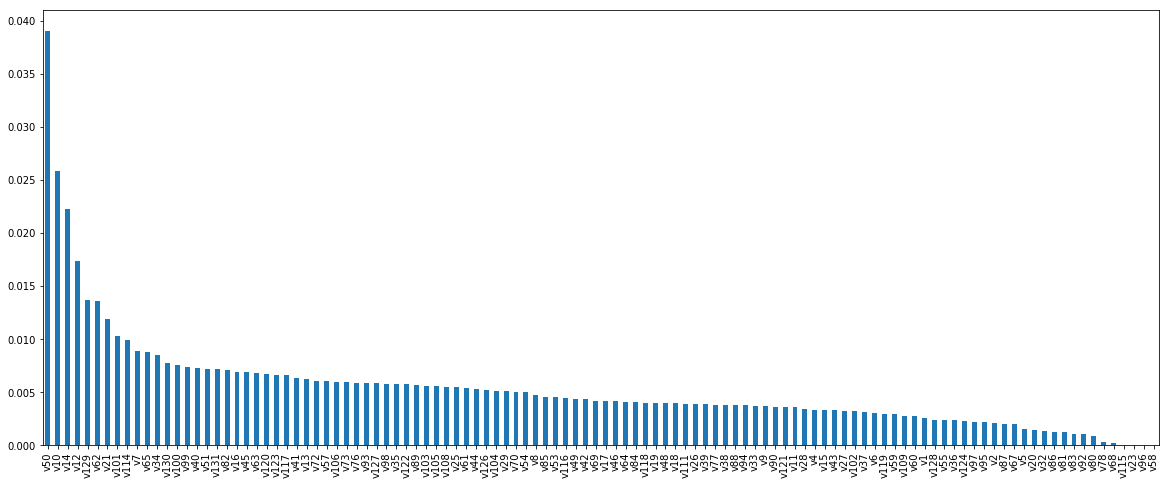

In [8]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Comparatively, we can see that there are a few features (left of the plot) that seem to contribute the most to predicting the target.There are also a few features with almost zero MI values on the right of the plot.

As I explained in the previous lecture, where to put the cut-off to select features is arbitrary. One could choose a certain value of MI after studying the plot above. An alternative and most frequent way of selecting features is to select the top 10, or top 20 features, or the features in the the top 10th percentile of the MI value distribution.

To do this, you can use mutual info in combination with SelectKBest or SelectPercentile from sklearn. SelectKBest allows you to determine how many features, and SelectPercentile the features within a certain percentile. See below.

In [9]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v7', 'v10', 'v12', 'v14', 'v21', 'v50', 'v62', 'v101', 'v114', 'v129'], dtype='object')

### Regression

In [10]:
# load dataset
data = pd.read_csv('houseprice.csv')
data.shape

(1460, 81)

In [11]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [12]:
data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [14]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


OverallQual      0.536192
GrLivArea        0.481306
TotalBsmtSF      0.387277
GarageCars       0.369204
GarageArea       0.364609
YearBuilt        0.353555
1stFlrSF         0.310840
GarageYrBlt      0.260601
MSSubClass       0.259361
FullBath         0.254650
YearRemodAdd     0.247581
2ndFlrSF         0.235792
LotFrontage      0.209652
TotRmsAbvGrd     0.185548
Fireplaces       0.178953
OpenPorchSF      0.166038
LotArea          0.165202
BsmtFinSF1       0.160011
BsmtUnfSF        0.115896
OverallCond      0.097178
MasVnrArea       0.093078
HalfBath         0.077095
WoodDeckSF       0.070980
BedroomAbvGr     0.041920
KitchenAbvGr     0.028798
ScreenPorch      0.028115
BsmtFullBath     0.016019
YrSold           0.009867
EnclosedPorch    0.006408
LowQualFinSF     0.003755
3SsnPorch        0.003627
MiscVal          0.002092
BsmtHalfBath     0.000000
BsmtFinSF2       0.000000
MoSold           0.000000
PoolArea         0.000000
Id               0.000000
dtype: float64

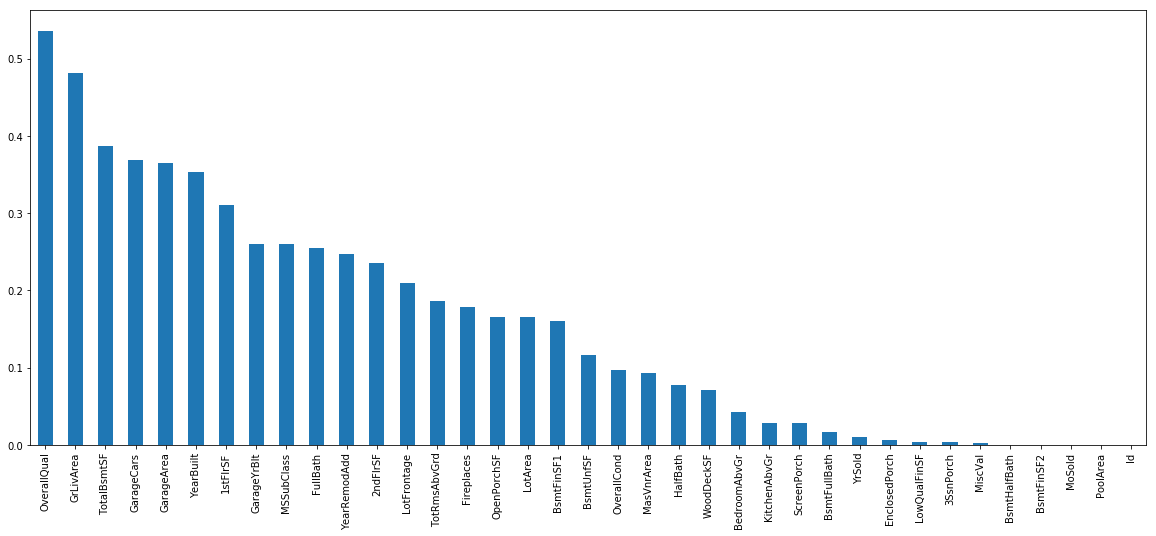

In [15]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [16]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageArea'], dtype='object')

I have not personally used mutual information in any of my projects. However, there is some value in the method. See for example:

Comparison between univariate and mutual information selection in [sklean website](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

In addition, mutual information has been widely covered, if anything else from a theoretical perspective, in several articles that I share in the additional reading resources section. Therefore I wanted to have it covered in the course, and I leave it up to you to explore it and see if you find any use in it.

That is all for this lecture, I hope you enjoyed it and see you in the next one!